# Trabajo Practico Nº 3
## SVM

### Se conjunto de datos creados TP3-1 en R2 
### Lineamente separables 
\begin{align*}
\large y = 2x - 4 \text{(Funcion de la recta)} \\
\end{align*}





### Conjuntos de datos TP3-1

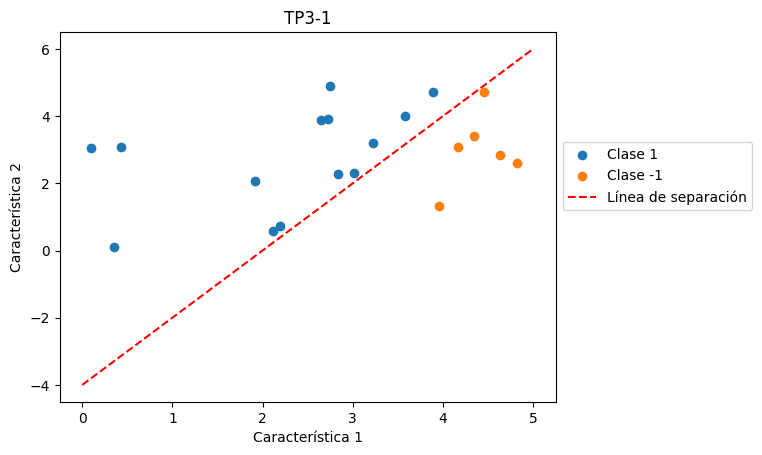

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Establecer una semilla aleatoria para la reproducibilidad
np.random.seed(0)

# Generar puntos aleatorios en el rango [0, 5] × [0, 5]
num_points = 20
x1 = np.random.uniform(0, 5, num_points)
x2 = np.random.uniform(0, 5, num_points)

# Definir la línea de separación
# Por ejemplo, y = 2x - 4
def separador(x):
    return 2 * x  - 4

# Asignar etiquetas de clase 1 o -1 según la posición con respecto a la línea
y_real = np.where(x2 >= separador(x1), 1, -1)

# Visualizar los datos
plt.scatter(x1[y_real == 1], x2[y_real == 1], label='Clase 1')
plt.scatter(x1[y_real == -1], x2[y_real == -1], label='Clase -1')
plt.plot([0, 5], [separador(0), separador(5)], color='red', linestyle='--', label='Línea de separación')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.legend(loc='lower left',bbox_to_anchor=(1, 0.5))
plt.title('TP3-1')
plt.show()


Se pude visualizar que el ___hiperplano___ de separación esta haciendo una buena clasificación de las clase pero no podemos garantizar que sea el optipo ya que hay puntos que se encuentra muy cerca del ___hiperplano___

## Se crea un perceptron simple escalon


In [2]:
# Función para crear un perceptron simple
# Función de activación

def step_activation(sum):
    return 1 if sum >= 0 else - 1

# Algoritmo de entrenamiento del perceptrón 

def train_perceptron(X, y, learning_rate, epochs=10):
    #Inicializar pesos y sesgo
    num_features = X.shape[1]
    w = np.zeros(num_features)
    b = 0
    
    for epoch in range(epochs):
        for i in range(X.shape[0]):
            sum = np.dot(X[i], w ) + b
            y_pred = step_activation(sum)
            
            # Actualiza pesos y sesgo
            if y[i] != y_pred:
                w += learning_rate * y[i] * X[i]
                b += learning_rate * y[i]
    return w ,b 



### Entrenamiento del preceptrón con el conjunto de datos TP3-1

In [3]:
# Combina los 2 arreglos y los transpone 
# Datos de entrenamiento
X1 = np.vstack((x1, x2)) . T
y = y_real

# Entrenar perceptron
learning_rate = 0.01
epochs = 1000
w, b = train_perceptron(X1, y, learning_rate, epochs)

predicciones = [step_activation(np.dot(x,w) + b) for x in X1]

print("Etiquetas reales:", y)
print("Predicciones del perceptrón:", predicciones)

Etiquetas reales: [ 1  1  1  1  1  1  1 -1 -1  1 -1  1  1 -1  1  1  1 -1  1 -1]
Predicciones del perceptrón: [1, 1, 1, 1, 1, 1, 1, -1, -1, 1, -1, 1, 1, -1, 1, 1, 1, -1, 1, -1]


### Grafica comparativa entre la separación real y la separación del perceptrón

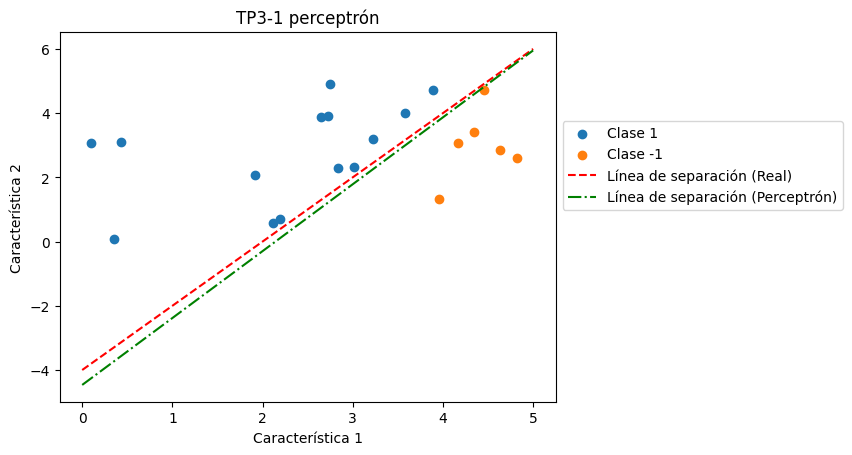

In [4]:
# Crear la gráfica
plt.scatter(x1[y_real == 1], x2[y_real == 1], label='Clase 1')
plt.scatter(x1[y_real == -1], x2[y_real == -1], label='Clase -1')
plt.plot([0, 5], [separador(0), separador(5)], color='red', linestyle='--', label='Línea de separación (Real)')
plt.plot([0, 5], [-(w[0]/w[1])*0 + (-b/w[1]), -(w[0]/w[1])*5 + (-b/w[1])], color='green', linestyle='-.', label='Línea de separación (Perceptrón)')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.legend(loc='lower left', bbox_to_anchor=(1, 0.5))
plt.title('TP3-1 perceptrón')
plt.show()

## Se conturye un nuevo conjunto TP3-2
\begin{align*}
\large y = 2x - 4 \text{(Funcion de la recta)} \\
\end{align*}

El conjunto tiene datos mal clasificados



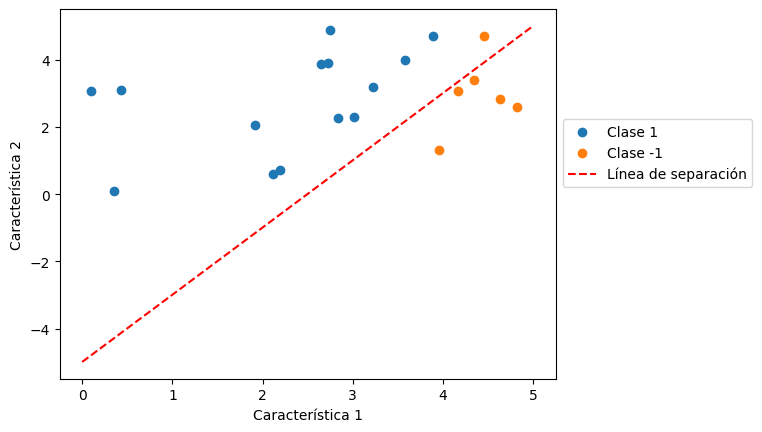

In [5]:

# Establecer una semilla aleatoria para la reproducibilidad
import numpy as np
import matplotlib.pyplot as plt

# Establecer una semilla aleatoria para la reproducibilidad
np.random.seed(0)

# Generar puntos aleatorios en el rango [0, 5] × [0, 5]
num_points = 20
x1 = np.random.uniform(0, 5, num_points)
x2 = np.random.uniform(0, 5, num_points)

# Definir la línea de separación con un pequeño sesgo
# Por ejemplo, y = 2x - 4 + ruido
def separador(x):
    ruido = np.random.normal(0, 0.5)
    return 2 * x - 4 + ruido

# Asignar etiquetas de clase 1 o -1 según la posición con respecto a la línea
y_real2 = np.where(x2 >= separador(x1), 1, -1)

# Visualizar los datos
plt.scatter(x1[y_real == 1], x2[y_real == 1], label='Clase 1')
plt.scatter(x1[y_real == -1], x2[y_real == -1], label='Clase -1')

x_separacion = np.array([0, 5])
y_separacion = separador(x_separacion)

plt.plot(x_separacion, y_separacion, color='red', linestyle='--', label='Línea de separación')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.legend(loc='lower left',bbox_to_anchor=(1, 0.5))
plt.show()




### Hiperplano òptimo con perceptron simple

In [6]:
X2 = np.vstack((x1, x2)) . T
y2 =  y_real2
# Entrenar perceptron
learning_rate = 0.01
epochs = 1000
w, b = train_perceptron(X2, y2, learning_rate, epochs)

predicciones = [step_activation(np.dot(x,w) + b) for x in X2]

print("Etiquetas reales:", y2)
print("Predicciones del perceptrón:", predicciones)


Etiquetas reales: [ 1  1  1  1  1  1  1  1 -1  1 -1  1  1 -1  1  1  1 -1  1 -1]
Predicciones del perceptrón: [1, 1, 1, 1, 1, 1, 1, 1, -1, 1, -1, 1, 1, -1, 1, 1, 1, -1, 1, -1]


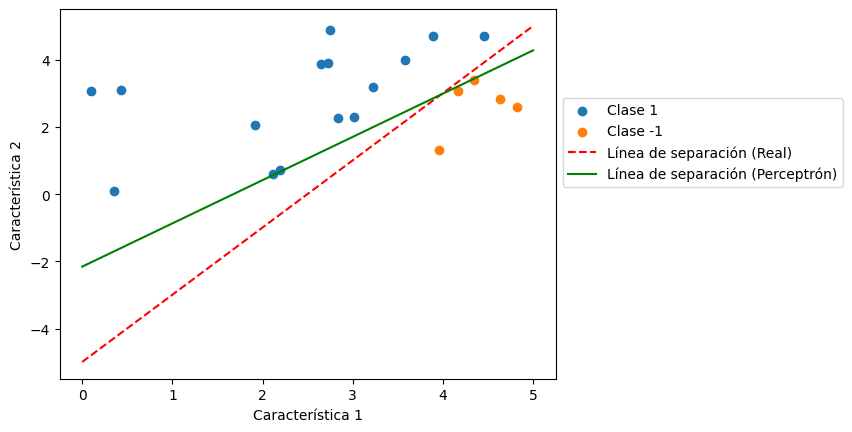

In [7]:
plt.scatter(x1[y_real2 == 1], x2[y_real2 == 1], label='Clase 1')
plt.scatter(x1[y_real2 == -1], x2[y_real2 == -1], label='Clase -1')
plt.plot(x_separacion,y_separacion, color='red', linestyle='--', label='Línea de separación (Real)')
plt.plot([0, 5], [-(w[0]/w[1])*0 + (-b/w[1]), -(w[0]/w[1])*5 + (-b/w[1])], color='green', linestyle='solid', label='Línea de separación (Perceptrón)')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.legend(loc='lower left', bbox_to_anchor=(1, 0.5))
plt.show()

In [21]:
from sklearn.linear_model import LogisticRegression
import cv2
import numpy as np
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Cargar imágenes y redimensionarlas
imagen_cow = cv2.imread('../imagenes/cow.jpg')
imagen_vaca = cv2.imread('../imagenes/vaca.jpg')

# Tamaño fijo para redimensionar todas las imágenes
fixed_size = (200, 200)

# Redimensionar las imágenes
imagen_cow = cv2.resize(imagen_cow, fixed_size)
imagen_vaca = cv2.resize(imagen_vaca, fixed_size)

# Convertir imágenes en escala de grises
imagen_cow_gris = cv2.cvtColor(imagen_cow, cv2.COLOR_BGR2GRAY)
imagen_vaca_gris = cv2.cvtColor(imagen_vaca, cv2.COLOR_BGR2GRAY)

# Aplanar las imágenes
vector_cow = imagen_cow_gris.flatten()
vector_vaca = imagen_vaca_gris.flatten()

# Crear un conjunto de datos combinando las imágenes y etiquetas
X = np.vstack((vector_cow, vector_vaca))
y = np.array([0, 1])

# Dividir aleatoriamente el conjunto de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear un clasificador SVM con Kernel lineal
# Crear un clasificador de Regresión Logística
clf = LogisticRegression()

# Entrenar el clasificador
clf.fit(X_train, y_train)

# Clasificar los píxeles del conjunto de prueba
y_pred = clf.predict(X_test)

# Evaluar la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo: {accuracy}")






ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 0

In [14]:
# Clasificar todos los píxeles de la imagen "cow.jpg"
imagen_resultado = imagen_cow.copy()
prediccion_cow = clf.predict(vector_cow)

# Realizar la segmentación de colores basada en las predicciones
colores_prediccion = {
    0: (0, 0, 255),  # Rojo para "Vaca"
    1: (0, 255, 0),  # Verde para "Cielo"
    2: (255, 0, 0)  # Azul para "Pasto"
}

mascara_prediccion = np.zeros_like(imagen_resultado)

for clase, color in colores_prediccion.items():
    mascara_prediccion[prediccion_cow == clase] = color

imagen_resultado = cv2.addWeighted(imagen_resultado, 1, mascara_prediccion, 0.5, 0)

# Mostrar la imagen con predicciones
cv2.imshow("Imagen con Predicciones", imagen_resultado)
cv2.waitKey(0)
cv2.destroyAllWindows()

ValueError: Expected 2D array, got 1D array instead:
array=[137. 141. 139. ... 100.  77.  82.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.